In [165]:
import pandas as pd
import numpy as np
import sklearn.datasets as dataset
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# Unsupervised Learning Techniques
* Unsupervised learning means training a model with training data that does not contain any target labels

# Clustering
* Is the task of identifying similar instances and assigning them to cluster (i.e. group of similar instances)
* Clustering can be used for:
    * Customer Segmentation
    * Dimensionality Reduction
    * Anomaly detection (outlier detection)
    * Semi-supervised learning
    * Segment an image
---
* Assuming that the data has a clustering structure, the computational complexityy of the kmeans algorithmn is generally linear with regards to:
    * Number of instances, m
    * Number of cluster, k
    * Number of dimensions/features, n
* Although kmeans is guranteed to converge, it may only converge to the local optimim and not the global optimum
    * This is dependent on the random initizaition step

In [130]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [131]:
X, y = dataset.make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [132]:
def plot_cluster(X, y=None):
    plt.scatter(X[:,0], X[:, 1], c=y, s=1)
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)

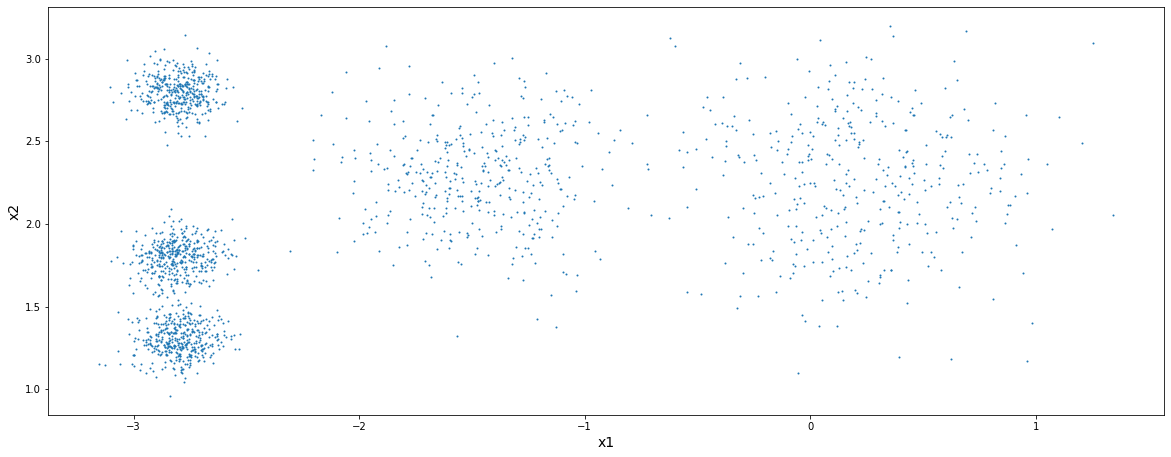

In [133]:
plt.figure(figsize=(20,7.5))
plot_cluster(X)

# K-means
* Hard-clustering is where we assign each instance to one cluster
* kmeans only care about the distance to the centroid when assigning the instances to the labels
* kmeans uses the K-Means ++ algorithm which introduced a smart initialization step that tend to select centroids that are distant from one and another 
    * This improvement result in kmeans to be less likely to select a sub-optimal model

In [134]:
import sklearn.cluster as cluster

k = 5  # number of cluster

km = cluster.KMeans(n_clusters=k, random_state=42)
km.fit(X)

y_prediction = km.predict(X) # each instance in X is fitted into one of the five clusters

In [135]:
y_prediction

array([0, 4, 1, ..., 2, 1, 4])

In [136]:
km.labels_ # in the context of clustering, an instance's label is the index of the cluster that this instance get assigned to by the algorithm

array([0, 4, 1, ..., 2, 1, 4])

In [137]:
centroids = km.cluster_centers_ # the 5 centroids
centroids

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

Text(0, 0.5, 'x2')

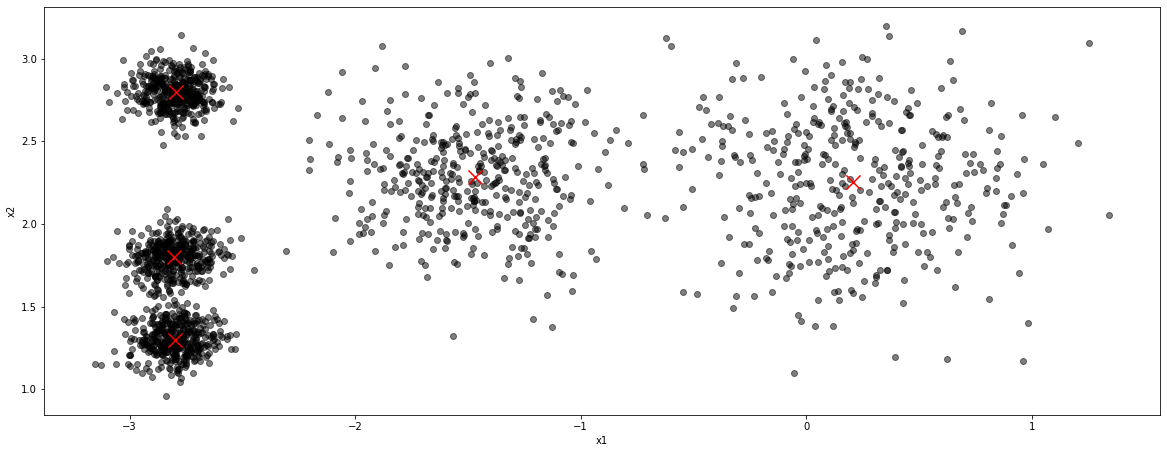

In [138]:
plt.figure(figsize=(20,7.5))

plt.scatter(X[:,0], X[:,1],c='k', alpha=0.5, label='data points')
plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='x', s=200, label='Centroids')

plt.xlabel('x1')
plt.ylabel('x2')

In [139]:
# Instead of using the distance to the centroid, we give each instance a score per cluster which is called soft clustering
# the score can be the distance between the instance and the centroid, similarly it can be an affinity score such as Gaussian RBF

distance_from_centroid = km.transform(X)

In [140]:
distance_from_centroid[:5]

array([[0.11146795, 3.04611916, 1.45402521, 1.54944305, 0.46779778],
       [0.51431557, 3.11541584, 0.99002955, 1.48612753, 0.07122059],
       [3.76340605, 1.32016676, 4.09069201, 2.67154781, 3.81713488],
       [0.52058348, 3.18153989, 1.00503563, 1.55085758, 0.13643124],
       [0.39014221, 2.98883057, 1.11490543, 1.39477359, 0.14170053]])

In [141]:
centroids

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [142]:
km.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [143]:
km.inertia_ # the lower the better

211.5985372581683

# Optimization Technique
* Depending on the random centroid initization step, we may end up with a sub-optimal result
* We can mitigate this risk by:
    * 1) Setting the random initization to centroids to locations where we know approximately where it should be
    * 2) Run the algorithm multiple times with different random initization amd keep the best solution

In [144]:
# Setting the random initization to centroids to locations where we know approximately where it should be

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

new_km = cluster.KMeans(n_clusters=k, init=good_init, n_init=1, random_state=42)
new_km.fit(X)

new_km.inertia_

211.62337889822365

In [145]:
# Run the algorithm multiple times with different random initization amd keep the best solution
# By default, the kmeans will run 10 which is control by the hyperparatmeter - n_init

new_km = cluster.KMeans(n_clusters=k, n_init=1000, random_state=42)
new_km.fit(X)

new_km.inertia_

211.59853725816828

In [146]:
# by default, kmeans leverage the kmeans++ algorithm which tend to select centroids that are distant from one and another

new_X, new_y = dataset.make_blobs(n_samples=1000, n_features=2, cluster_std=3, random_state=42)

km_1 = cluster.KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=5)
km_1.fit(new_X)

print('Kmeans with default Kmeans++ algorithm')
print(f'Score: {km_1.inertia_}')
print()

km_2 = cluster.KMeans(n_clusters=k, init='random', random_state=42, n_init=5)
km_2.fit(new_X)

print('Kmeans with random initization of centroids')
print(f'Score: {km_2.inertia_}')

Kmeans with default Kmeans++ algorithm
Score: 12181.53574260569

Kmeans with random initization of centroids
Score: 12179.007384763881


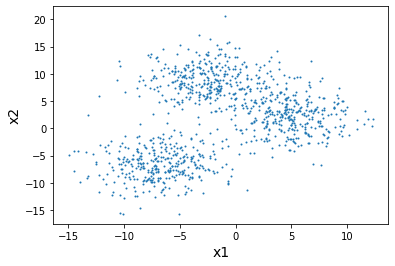

In [147]:
plot_cluster(new_X)

# Accelerated KMeans and MiniBatch Kmeans
* by default, kmeans uses the 'elkan' algorithm  which bypass a lot unncessary calculation
* the original algorithm can be used by setting the hyperparameter to 'full', otherwise the default value is 'elkan'

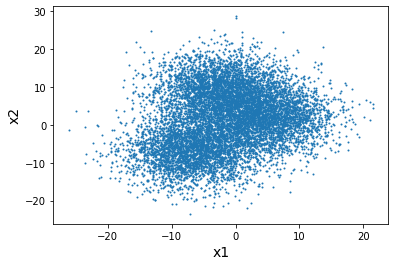

In [148]:
new_X, new_y = dataset.make_blobs(n_samples=10000, n_features=2, cluster_std=5, random_state=42)
plot_cluster(new_X)

In [149]:
# instead of using the full training set, we can use mini-batch to train the kmeans model 
# although mini-batch kmeans is much faster than regular k-means, its inertia is slightly worse especially as the number of cluster increases
# inertia will keep dropping as we increase the number of cluster 
# inertia is the mean squared distance between each instance and the centroid
mb_kms = cluster.MiniBatchKMeans(n_clusters=k, random_state=42)
mb_kms.fit(X)
mb_kms.inertia_

211.93186531476786

In [151]:
number_of_cluster = [i for i in range(10,41)]
mb_inertia_list = []
reg_inertia_list = []

for i in number_of_cluster:
    mb_kms = cluster.MiniBatchKMeans(n_clusters=i, random_state=42)
    kms = cluster.KMeans(n_clusters=i, random_state=42)

    mb_kms.fit(new_X)
    kms.fit(new_X)

    mb_inertia_list.append(mb_kms.inertia_)
    reg_inertia_list.append(kms.inertia_)    

Text(0, 0.5, 'Inertia')

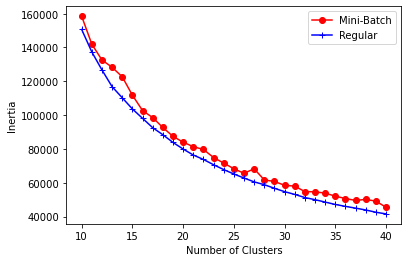

In [157]:
plt.plot(number_of_cluster, mb_inertia_list, label='Mini-Batch', color='r', marker='o')
plt.plot(number_of_cluster, reg_inertia_list, label='Regular', color='b', marker='+')
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Choosing the best number of cluster 

In [167]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = dataset.make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

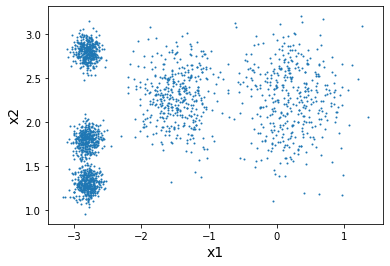

In [168]:
plot_cluster(X)

Text(0, 0.5, 'Inertia')

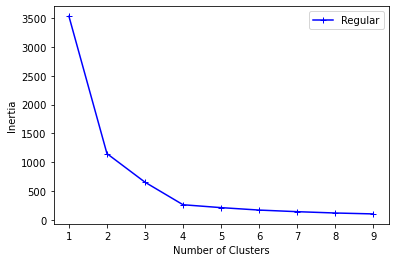

In [169]:
number_of_cluster = [i for i in range(1,10)]
reg_inertia_list = []

for i in number_of_cluster:
    kms = cluster.KMeans(n_clusters=i, random_state=42)
    kms.fit(X)
    reg_inertia_list.append(kms.inertia_) 

plt.plot(number_of_cluster, reg_inertia_list, label='Regular', color='b', marker='+')
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
# A more precise method of choosing the number of cluster is using the sihouette coefficient score 
# Sihouette Coefficient ranges from -1 to 1 
# +1 means that the instances are well inside its own cluster and far from other cluster
# 0 means that the instances are close to the its own cluster's boundary
# -1 means that the instances may have been assigned to the wrong cluster

In [170]:
kms = cluster.KMeans(n_clusters=5, random_state=42)
kms.fit(X)
kms.inertia_

211.5985372581683

In [176]:
kms.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
metrics.silhouette_score(X, kms.labels_)

0.655517642572828

Text(0.5, 1.0, 'Silhouette Score as a function of K - Number of Clusters')

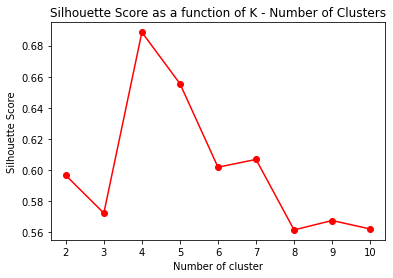

In [180]:
silhouette_score_list = []
number_of_cluster = [i for i in range(2,11)]

for i in number_of_cluster:
    kms = cluster.KMeans(n_clusters=i, random_state=42)
    kms.fit(X)
    ss = metrics.silhouette_score(X, kms.labels_)

    silhouette_score_list.append(ss)

plt.plot(number_of_cluster, silhouette_score_list, marker='o', color='r')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score as a function of K - Number of Clusters')